# Unsupervised Learning in Python

_Aprenda a agrupar, transformar, visualizar y extraer información de conjuntos de datos sin etiquetar con scikit-learn y scipy._

<br>

---

***Descripción del curso*** 

---

Supongamos que tiene una colección de clientes con una variedad de características, como edad, ubicación e historial financiero, y desea descubrir patrones y clasificarlos en grupos. 

O quizás tiene un conjunto de textos, como páginas de wikipedia, y desea segmentarlos en categorías según su contenido. 

Este es el mundo del aprendizaje no supervisado, llamado así porque no está guiando o supervisando el descubrimiento de patrones mediante alguna tarea de predicción, sino que **descubre estructuras ocultas a partir de datos no etiquetados**. 

El aprendizaje no supervisado abarca una variedad de técnicas en el aprendizaje automático, desde **la agrupación en clústeres hasta la reducción de dimensiones y la factorización matricial**.

En este curso, aprenderá los fundamentos del aprendizaje no supervisado e implementará los algoritmos esenciales utilizando scikit-learn y scipy. Aprenderá a agrupar, transformar, visualizar y extraer conocimientos de conjuntos de datos sin etiquetar, y finalizará el curso creando _un sistema de recomendación para recomendar artistas musicales populares_.

In [1]:
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## 1) Clustering for dataset exploration

**(Agrupación para la exploración de conjuntos de datos)**

Aprenda a descubrir los grupos subyacentes (o "clústeres") en un conjunto de datos. Al final de este capítulo, agrupará empresas utilizando sus precios de mercado de valores y distinguirá diferentes especies agrupando sus medidas.


In [2]:
# Agrupacion
# Reduccion de dimensiones

In [3]:
# Evaluar el agrupamiento
# INERCIA: Puede medir la dispersion de las muestras dentro de cada grupo
# => Que tan lejos esta las muestras de su centroides (Se busca minimizar este valor)

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/MayumyCH/data-scientist-with-python-datacamp/main/1.%20Courses/26.%20Unsupervised%20Learning%20in%20Python/dataset/seeds.csv',
                 header=None)
df.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [5]:
samples = df.drop(7, axis=1).values

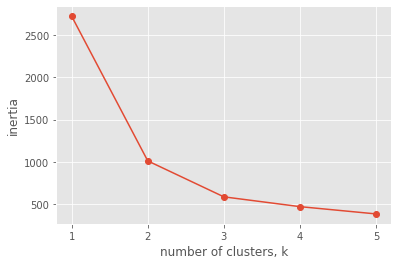

In [6]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

Las muestras de granos provienen de una mezcla de 3 variedades de granos diferentes: "Kama", "Rosa" y "Canadian"

In [7]:
df['varieties'] = [ 'Canadian wheat' if i == 3 else 'Kama wheat'
                                     if i == 1 else 'Rosa wheat' for i in df[7] ]
varieties = df['varieties'] 

In [8]:
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# model.fit(samples)
# labels = model.predict(samples)
labels = model.fit_predict(samples)
# print(labels)

df = pd.DataFrame({'labels': labels, 'varieties': varieties})
ct = pd.crosstab(df['labels'],df['varieties'])

print(ct,"\n")
print(model.inertia_)

varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
0                       2          60          10
1                       0           1          60
2                      68           9           0 

587.3186115940427


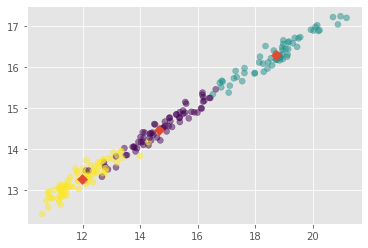

In [9]:
# ADICIONAL
xs = samples[:,0]
ys = samples[:,1]

plt.scatter(xs, ys, c=labels,alpha=0.5)
centroids = model.cluster_centers_

centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

plt.scatter(centroids_x, centroids_y, marker='D',s=50)
plt.show()


In [10]:
# DATO
# En la agrupacion de K-means, la varianza de una caracteristica
# influye en el algoritmo de agrupacion
# Por ende debe transformarse para que los features tengan la misma variacion
# StandarScaler [ media 0 y varianza 1]
# StandarScaler transforma los datos  ||  fit() transform()
# Kmeans asigna etiquetas de grupo a las muestras || fit() predict()

# MaxAbscaler || Normalizer || similar a StandardScaler

[fish measurement data](http://jse.amstat.org/jse_data_archive.htm)

In [11]:
df = pd.read_csv('https://raw.githubusercontent.com/MayumyCH/data-scientist-with-python-datacamp/main/1.%20Courses/26.%20Unsupervised%20Learning%20in%20Python/dataset/fish.csv',
                 header=None)
df.head()

,0,1,2,3,4,5,6
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1


In [12]:
samples = df.drop(0, axis=1).values
species = df[0] 
# samples

In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans

# Hay que elegir entre escalar o normalizar
# normalizer = Normalizer()
scaler = StandardScaler()
kmeans = KMeans(n_clusters=4)
# Pipeline
pipeline = make_pipeline(scaler,kmeans)

pipeline.fit(samples)
labels = pipeline.predict(samples)

df = pd.DataFrame({'labels': labels, 'species': species})
ct = pd.crosstab(df['labels'],df['species'])

print(ct)

species  Bream  Pike  Roach  Smelt
labels                            
0           33     0      1      0
1            1     0     19      1
2            0    17      0      0
3            0     0      0     13


Tenga en cuenta que Normalizer () es diferente a StandardScaler (), que utilizó en el ejercicio anterior. Mientras que StandardScaler () estandariza las características (como las características de los datos de peces del ejercicio anterior) eliminando la media y escalando a la varianza unitaria, Normalizer () reescala cada muestra

## 2) Visualization with hierarchical clustering and t-SNE

**(Visualización con agrupamiento jerárquico y t-SNE)**

En este capítulo, aprenderá sobre dos técnicas de aprendizaje no supervisadas para visualización de datos, agrupamiento jerárquico y t-SNE. La agrupación jerárquica fusiona las muestras de datos en agrupaciones cada vez más gruesas, lo que produce una visualización de árbol de la jerarquía de agrupaciones resultante. t-SNE mapea las muestras de datos en el espacio 2d para que se pueda visualizar la proximidad de las muestras entre sí.


In [14]:
# T-SNE: Crea un mapa 2D de cualquier conjunto de datos
# Agrupacion Jerarquica: Organiza las muestras en una jerarquia de agrupaciones

In [15]:
df = pd.read_csv('https://raw.githubusercontent.com/MayumyCH/data-scientist-with-python-datacamp/main/1.%20Courses/26.%20Unsupervised%20Learning%20in%20Python/dataset/seeds.csv',
                 header=None)
# df.head()
samples = df.drop(7, axis=1).values
df['varieties'] = [ 'Canadian wheat' if i == 3 else 'Kama wheat'
                                     if i == 1 else 'Rosa wheat' for i in df[7] ]
varieties = df['varieties'] 

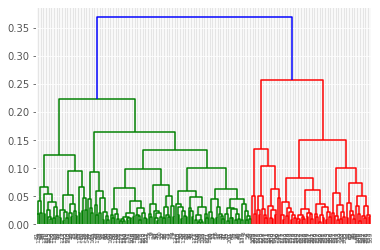

In [16]:
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt

normalized_movements = normalize(samples)
# mergings = linkage(normalized_movements,'single') #,method='complete'
mergings = linkage(normalized_movements,method='complete') 
# plt.figure()
# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
          #  labels=varieties, 
           leaf_rotation=90,
           leaf_font_size=6)
plt.show()

In [17]:
# Altura del dendograma distancia / los clusteres fusionados
# La distancia entre 2 conglomerados se mide mediante un metodo de vinculación
# Usamos el methodo completo

In [18]:
# La distancia entre 2 conglomerados es el max de las distancias entre sus muestras
# Parametro METODO
# La agrupacion jerarquica se puede extraer mediante la funcion Fcluster

En el video, aprendiste que el método de vinculación define cómo se mide la distancia entre grupos. 

En el **enlace completo**, la distancia entre grupos es la **distancia entre los puntos más lejanos de los grupos**.

**En un solo enlace**, la distancia entre grupos es la **distancia entre los puntos más cercanos de los grupos**.

In [19]:
samples

array([[15.26  , 14.84  ,  0.871 , ...,  3.312 ,  2.221 ,  5.22  ],
       [14.88  , 14.57  ,  0.8811, ...,  3.333 ,  1.018 ,  4.956 ],
       [14.29  , 14.09  ,  0.905 , ...,  3.337 ,  2.699 ,  4.825 ],
       ...,
       [13.2   , 13.66  ,  0.8883, ...,  3.232 ,  8.315 ,  5.056 ],
       [11.84  , 13.21  ,  0.8521, ...,  2.836 ,  3.598 ,  5.044 ],
       [12.3   , 13.34  ,  0.8684, ...,  2.974 ,  5.637 ,  5.063 ]])

In [20]:
# import pandas as pd
# from scipy.cluster.hierarchy import fcluster

# # Use fcluster to extract labels: labels
# labels = fcluster(samples,t=0.5, criterion='distance')

# # Create a DataFrame with labels and varieties as columns: df
# df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# # Create crosstab: ct
# ct = pd.crosstab(df['labels'],df['varieties'])

# # Display ct
# print(ct)

In [21]:
# T-SNE: >> Incrustacion de vecino estocastico distribuido en t
# Traza muestras de su espacio de alta dimension en un espacio de 2 0 3 dimensiones 
# para que puedan visualizarse
# T-SNE es una ayuda visual invaluable para comprender el conjunto de datos

In [22]:
# DATASET GRANO
df = pd.read_csv('https://raw.githubusercontent.com/MayumyCH/data-scientist-with-python-datacamp/main/1.%20Courses/26.%20Unsupervised%20Learning%20in%20Python/dataset/seeds.csv',
                 header=None)
df.head()
samples = df.drop(7, axis=1).values
variety_numbers = df[7]

df['varieties'] = [ 'Canadian wheat' if i == 3 else 'Kama wheat'
                                     if i == 1 else 'Rosa wheat' for i in df[7] ]
varieties = df['varieties'] 

In [23]:
len(samples)

210

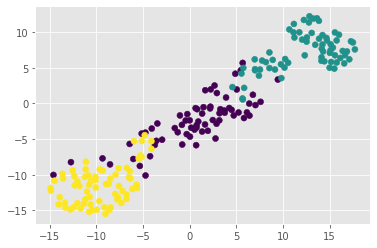

In [24]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(samples)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys, c=variety_numbers)

plt.show()

¡Excelente! Como puede ver, la visualización t-SNE logra separar las 3 variedades de muestras de grano. Pero, ¿cómo funcionará con los datos bursátiles?

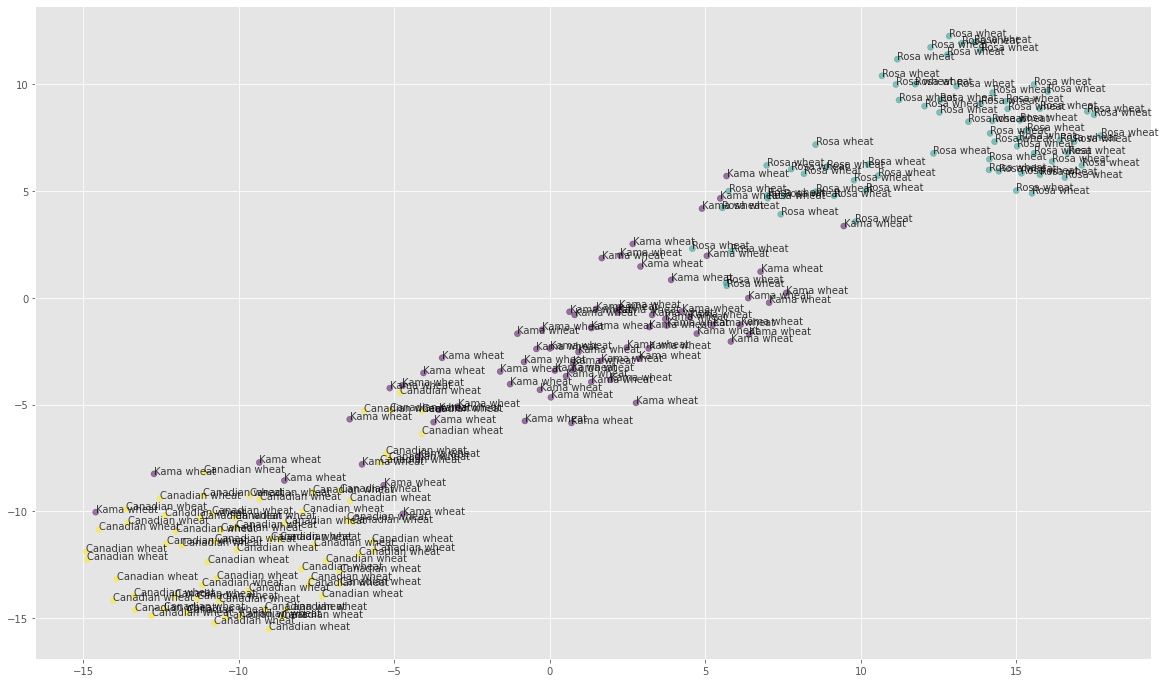

In [25]:
plt.figure(figsize=(20, 12))
plt.scatter(xs, ys,alpha=0.5,c=variety_numbers)

for x, y, variety in zip(xs, ys, varieties):
    plt.annotate(variety, (x, y), fontsize=10, alpha=0.75)

plt.show()

## 3)Decorrelating your data and dimension reduction

**(Descorrelacionar sus datos y reducción de dimensiones)**

La reducción de dimensión resume un conjunto de datos utilizando sus patrones comunes. En este capítulo, aprenderá sobre las técnicas de reducción de dimensión más fundamentales, "Análisis de componentes principales" ("PCA"). El PCA se usa a menudo antes del aprendizaje supervisado para mejorar el rendimiento y la generalización del modelo. También puede ser útil para el aprendizaje sin supervisión. Por ejemplo, empleará una variante de PCA que le permitirá agrupar los artículos de Wikipedia por su contenido.

In [26]:
# Tecnicas para la reduccion de dimensiones
# La reduccion de dimensiones busca patrones en los datos 
# y los usa para vollver a expresarlos en forma comprimida

Analisis de componentes principales o PCA

Se realiza en dos pasos
1.   Descorrelacion (Desplaza la muestra - media 0
2.   Elemento de lista





In [27]:
# La correlacion lineal se puede medir con la correlacion de Pearson [-1 a 1]
# Los valores mas grandes indican una correlacion + fuerte y 0 no hya correlacion

In [28]:
# DATASET GRANO
df = pd.read_csv('https://raw.githubusercontent.com/MayumyCH/data-scientist-with-python-datacamp/main/1.%20Courses/26.%20Unsupervised%20Learning%20in%20Python/dataset/seeds.csv',
                 header=None)
df.head()
# samples = df.drop(7, axis=1).values
variety_numbers = df[7]

df['varieties'] = [ 'Canadian wheat' if i == 3 else 'Kama wheat'
                                     if i == 1 else 'Rosa wheat' for i in df[7] ]
varieties = df['varieties'] 
grains = df[[4,3]].values

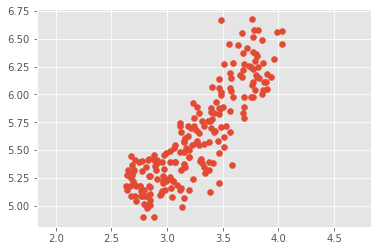

0.8604149377143466


In [29]:
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Assign the 0th column of grains: width
width = grains[:,0]

# Assign the 1st column of grains: length
length = grains[:,1]

# Scatter plot width vs length
plt.scatter(width, length)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width,length)

# Display the correlation
print(correlation)

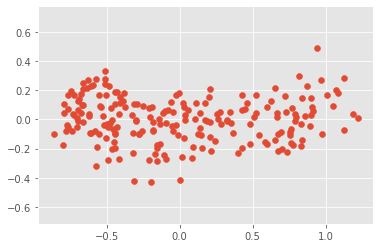

2.5496075358378932e-17


In [30]:
# Import PCA
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(grains)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)

¡Excelente! ¡Ha descorrelacionado con éxito las medidas de grano con PCA!

**Intrinsic dimension**

In [31]:
# dimension intrinseca de un conjunto de datos es el # de caracteristicas necesarias para aproximarlo
# Usar la dimension intrinseca para la reduccion de dimension

In [32]:
# El primer componente principal de los datos es la dirección en la que los datos varían más

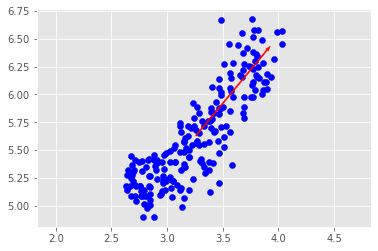

In [33]:
# Make a scatter plot of the untransformed points
plt.scatter(grains[:,0], grains[:,1], color='blue')

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(grains)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

¡Excelente trabajo! Esta es la dirección en la que más varían los datos de grano.

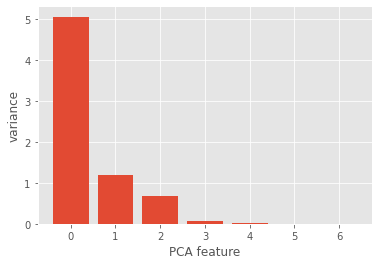

In [34]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [35]:
# FISH DATASET
df = pd.read_csv('https://raw.githubusercontent.com/MayumyCH/data-scientist-with-python-datacamp/main/1.%20Courses/26.%20Unsupervised%20Learning%20in%20Python/dataset/fish.csv',
                 header=None)
df.head()
samples = df.drop(0, axis=1).values
# species = df[0] 

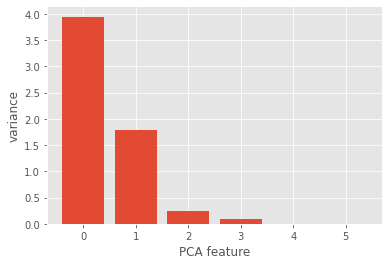

In [36]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()


Dado que las características de PCA 0 y 1 tienen una varianza significativa, la dimensión intrínseca de este conjunto de datos parece ser 2.

In [37]:
# PCA DESCARTA LAS CARACTERISTICAS DE BAJA VARIANZA 
# Y ASUME QUE LAS CARACTERISTICAS DE MAYOR VARIANZA SON INFORMATIVAS

In [38]:
# LA MATRIZ DE FRECUENCIA DE PALABRAS
# TRUNCATED SVD -- trabaja con matrices csr_matriz

In [39]:
ss = StandardScaler()
scaled_samples = ss.fit_transform(samples)
# scaled_samples

In [40]:
# Import PCA
from sklearn.decomposition import PCA

# Create a PCA model with 2 components: pca
pca = PCA(n_components=2)

# Fit the PCA instance to the scaled samples
pca.fit(scaled_samples)

# Transform the scaled samples: pca_features
pca_features = pca.transform(scaled_samples)

# Print the shape of pca_features
print(pca_features.shape)

(85, 2)


¡Magnífico! Has reducido con éxito la dimensionalidad de 6 a 2.

In [41]:
docs = ['cats say meow', 'dogs say woof', 'dogs chase cats']
documents = ['cats say meow', 'dogs say woof', 'dogs chase cats']

In [42]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer() 

# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(documents)

# Print result of toarray() method
print(csr_mat.toarray())

# Get the words: words
words = tfidf.get_feature_names()

# Print words
print(words)

[[0.51785612 0.         0.         0.68091856 0.51785612 0.        ]
 [0.         0.         0.51785612 0.         0.51785612 0.68091856]
 [0.51785612 0.68091856 0.51785612 0.         0.         0.        ]]
['cats', 'chase', 'dogs', 'meow', 'say', 'woof']


### **Clustering Wikipedia articles!**

[The Wikipedia dataset](https://www.lateral.io/resources-blog/the-unknown-perils-of-mining-wikipedia)


In [43]:
# Perform the necessary imports
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components=50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters=6)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd,kmeans)

¡Excelente! Ahora que ha configurado su canalización, la utilizará en el siguiente ejercicio para agrupar los artículos.

In [45]:
# Import pandas
import pandas as pd

# Fit the pipeline to articles
pipeline.fit(articles)

# Calculate the cluster labels: labels
labels = pipeline.predict(articles)

# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'article': titles})

# Display df sorted by cluster label
print(df.sort_values('label'))

## 4) Discovering interpretable features

**(Descubriendo características interpretables)**

En este capítulo, aprenderá acerca de una técnica de reducción de dimensiones llamada "Factorización de matriz no negativa" ("NMF") que expresa muestras como combinaciones de partes interpretables. Por ejemplo, expresa documentos como combinaciones de temas e imágenes en términos de patrones visuales comunes. ¡También aprenderá a usar NMF para crear sistemas de recomendación que pueden encontrarle artículos similares para leer o artistas musicales que coincidan con su historial de escucha!

In [46]:
# NMF es una tecnica de reduccion de dimensiones
# PCA no interpretable || NMF INTERPRETABLE
# Datos sean >= 0

In [47]:
# Características NMF de los artículos de Wikipedia

from sklearn.decomposition import NMF

# Create an NMF instance: model
model = NMF(n_components=6)

# Fit the model to articles
model.fit(articles)

# Transform the articles: nmf_features
nmf_features = model.transform(articles)

# Print the NMF features
print(nmf_features.round(2))


In [48]:
# Import pandas
import pandas as pd

# Create a pandas DataFrame: df
df = pd.DataFrame(nmf_features,index=titles)

# Print the row for 'Anne Hathaway'
print(df.loc['Anne Hathaway'])

# Print the row for 'Denzel Washington'
print(df.loc['Denzel Washington'])

¡Buen trabajo! Tenga en cuenta que para ambos actores, la característica 3 de NMF tiene, con mucho, el valor más alto. Esto significa que ambos artículos se reconstruyen utilizando principalmente el tercer componente NMF.

In [48]:
# Import pandas
import pandas as pd

# Create a DataFrame: components_df
components_df = pd.DataFrame(model.components_,columns=words)

# Print the shape of the DataFrame
print(components_df.shape)

# Select row 3: component
component = components_df.iloc[3]

# Print result of nlargest
print(component.nlargest())


In [48]:
# Explore el conjunto de datos de dígitos LED
# Import pyplot
from matplotlib import pyplot as plt

# Select the 0th row: digit
digit = samples[0,:]

# Print digit
print(digit)

# Reshape digit to a 13x8 array: bitmap
bitmap = digit.reshape((13,8))

# Print bitmap
print(bitmap)

# Use plt.imshow to display bitmap
plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()

In [ ]:
def show_as_image(sample):
    bitmap = sample.reshape((13, 8))
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()

In [ ]:
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF model: model
model = NMF(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

# Assign the 0th row of features: digit_features
digit_features = features[0,:]

# Print digit_features
print(digit_features)

In [ ]:
# CON PCA
# Import PCA
from sklearn.decomposition import PCA

# Create a PCA instance: model
model = PCA(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)
    

**Building recommender systems using NMF**

In [ ]:
# Perform the necessary imports
import pandas as pd
from sklearn.preprocessing import normalize

# Normalize the NMF features: norm_features
norm_features = normalize(nmf_features)

# Create a DataFrame: df
df = pd.DataFrame(norm_features,index=titles)

# Select the row corresponding to 'Cristiano Ronaldo': article
article = df.loc['Cristiano Ronaldo']

# Compute the dot products: similarities
similarities = df.dot(article)

# Display those with the largest cosine similarity
print(similarities.nlargest())

**Recomendar artistas musicales parte I**

In [ ]:
# Perform the necessary imports
from sklearn.decomposition import NMF
from sklearn.preprocessing import Normalizer, MaxAbsScaler
from sklearn.pipeline import make_pipeline

# Create a MaxAbsScaler: scaler
scaler = MaxAbsScaler()

# Create an NMF model: nmf
nmf = NMF(n_components=20)

# Create a Normalizer: normalizer
normalizer = Normalizer()

# Create a pipeline: pipeline
pipeline = make_pipeline(scaler,nmf,normalizer)

# Apply fit_transform to artists: norm_features
norm_features = pipeline.fit_transform(artists)

In [ ]:
# Import pandas
import pandas as pd

# Create a DataFrame: df
df = pd.DataFrame(norm_features,index=artist_names)

# Select row of 'Bruce Springsteen': artist
artist = df.loc['Bruce Springsteen']

# Compute cosine similarities: similarities
similarities = df.dot(artist)

# Display those with highest cosine similarity
print(similarities.nlargest())